# Project: Investigate Titanic Dataset




## References

Exploratory data analysis:
* https://towardsdatascience.com/how-to-use-python-seaborn-for-exploratory-data-analysis-1a4850f48f14
* https://towardsdatascience.com/data-preprocessing-and-eda-for-data-science-50ba6ea65c0a

Modelling:
* This section is based on the walk-through video from Ken Jee available in youtube: https://www.youtube.com/watch?v=I3FBJdiExcg&t=1612s



## Introduction
<a id='intro'></a>

The goal of this project is to analyse the Titanic training dataset and implement a series of classification Machine Learning models to predict if a passenger will survive or not. 

Firstly, our goal is to both provide an overview of the dataset as a whole and to look at each of the variables and the relationships among them. To do so, we will answer a set of key questions, which include:

- Univariate Analysis: What do the variables look like?
- Bivariate Analysis: What is the relationship between two variables?
- Multivariate Analysis: What is the relationship between multiple variables?
- Which are the key attributes that make a passenger likely to survive? And to die?

Next, we will briefly comment on the Machine Learning models that could be a good fit for the data provided and will implement them to the training set. We will also look at the accuracy of the models and how we can improve them by applying feature engineering.

In [1]:
#importing the libraries

# preprocessing and eda
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
%matplotlib inline

# modelling
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

#data_train, data_validation, label_train, label_validation = \
    #train_test_split(data, data["label"], test_size=0.3, random_state=5) #input the df, the dependent var, etc

In [2]:
# load datasets
df = pd.read_csv('train.csv')

### General Properties

This dataset has 12 variables, 11 features plus the target variable (Survived), and 891 observations. The name of the majority of the variables is self-explanatory but there are some exceptions. Below you can find each of the variables with some of the observations. I have also tried to clarify the less obvious ones:
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

The full description of the features can be found in the next table [here](https://www.kaggle.com/c/titanic/data), extracted from Kaggle.

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As it can be seen in the Non-Null column below, most of the variables do not have missing values. Nevertheless, variables like Age, Cabin and Embarked do have missing values and we will look into them next. 

We can also see the variable type. Summarazing, we have:
- 5 int64 
- 5 object
- 2 float64

Further investigation indicates that the object variables are of the **string** type:

In [6]:
type(df['Pclass'][0])

numpy.int64

Variables go from 2 different values, for example Survived, which has 0 or 1, to 891 different values. Examples of the latter are PassengerId and Name.

In [7]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

If we wanted to better understand the unique values of, for instance, Pclass or Embarked we could do as follows:

In [8]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
df['Pclass'].unique()

array([3, 1, 2])

We can now conclude that:
- There were three Ports of embarkation: S = Southampton, C = Cherbourg and Q = Queenstown
- Passengers were distributed into one of the 3 classes

Looking at missing values, Age, Cabin and Embarked are the only features with missing values

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Finally, if we check whether there are duplicated rows in our dataset it can be seen that there aren´t duplicates in our dataset

In [11]:
# Duplicate rows in the white wine dataset
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [12]:
sum(df.duplicated())

0

## Exploratory Data Analysis


### Univariate Analysis: How do the variables look like?

First, let us quickly analyse the distribution of the numerical variables:

In [12]:
# this plots multiple seaborn histograms on different subplots.
# 
def plot_multiple_histograms(df, cols):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
       
    figwidth = 4 * num_cols
    figheight = 3 * num_rows    
    fig, axs = plt.subplots(num_rows, num_cols,figsize=(figwidth, figheight))

    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
            
        if num_rows == 1:
            if num_cols == 1:
                sns.histplot(df[col], kde=False, ax=axs,linewidth=0.5)
            else:
                sns.histplot(df[col], kde=False, ax=axs[j],linewidth=0.5)
        else:
            sns.histplot(df[col], kde=False, ax=axs[i, j],linewidth=0.5)



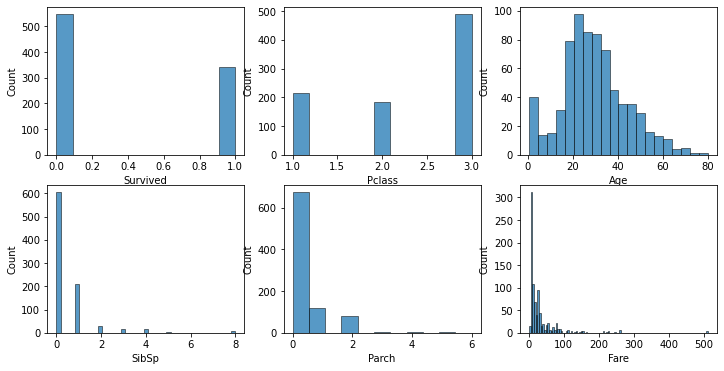

In [13]:
 plot_multiple_histograms(df, ['Survived', 'Pclass', 'Age','SibSp','Parch','Fare'])

- **Survived**: The number of passengers that died (0) is about 520, whereas the number of passengers that survived (1) is about 330
- **Class**: While first and second class are similar in number of passengers, third class stands out from the rest
- **Age**: At a high level, the Age variable presents a right-skewed distribution and the values mostly fall in the range between 20 and 40 years
- **SibSp**: The histogram indicates that the majority of the passengers were either without sibling/spouses or with at most 1 SibSp
- **Parch**: Similarly as SibSp, most of the passengers in the Titanic did not have any parent/child with them
- **Fare**: The price paid for the vast majority of the passengers is in the range from 0 to 50 British Pounds. It can also be appreciate some outliers from passengers that paid over 200 British Pounds


We also have Age and Port of Embarkation as categorical variables. 

Regarding **Sex**, the number of males is almost two times the number of females aboard

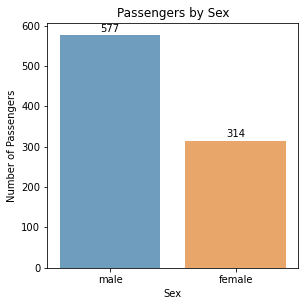

In [14]:
plt.figure(figsize=(4.5, 4.5))
splot = sns.countplot(x="Sex", data=df,alpha=.7)

for p in splot.patches:
    splot.annotate(
    format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2.,
    p.get_height()/1.02),
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10),
    textcoords = 'offset points'
)

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
    
plt.title("Passengers by Sex")
plt.ylabel("Number of Passengers")
plt.xlabel("Sex");

**Port of Embarkation:** The graph below indicates that 644 out of the total 891 passengers embarked in Southampton, which represents more than 70% of the total number of passengers. Passengers were also embarked at Chersbourg (France) and Queenstown (Ireland).

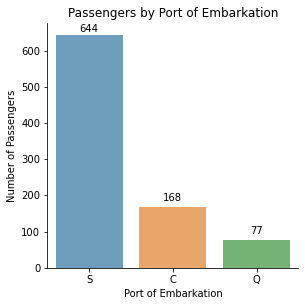

In [15]:
plt.figure(figsize=(4.5, 4.5))
splot = sns.countplot(x="Embarked", data=df,alpha=.7)

for p in splot.patches:
    splot.annotate(
    format(p.get_height(), '.0f'), 
    (p.get_x() + p.get_width() / 2.,
    p.get_height()/1.02),
    ha = 'center', 
    va = 'center', 
    xytext = (0, 10),
    textcoords = 'offset points'
)

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True
    
plt.title("Passengers by Port of Embarkation")
plt.ylabel("Number of Passengers")
plt.xlabel("Port of Embarkation");

### Bivariate Analysis: What is the relationship between two variables?

First of all, let's analyse the relationship between two variables. To do so, we will draw correlation heatmaps (and if there were irrelevant features, we would drop them). Note that correlation heatmaps will only be drawn for numerical variables as the process for categorical variables is a lot dirtier.

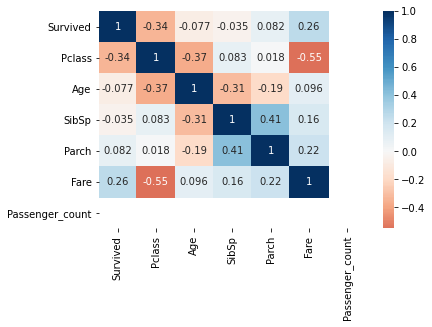

In [55]:
sns.heatmap(df.corr(), cmap='RdBu',center=0,annot=True);

Let's sort the features to see in a better way the features that are highly correlated and the ones that hold no value in relation to other features.

In [56]:
df.isnull().sum()

Survived             0
Pclass               0
Name                 0
Sex                  0
Age                177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Passenger_count      0
dtype: int64

In [64]:
df_clustermap = df.drop(columns=['Cabin','Age','Embarked','Passenger_count'])
df_clustermap.shape

(891, 8)

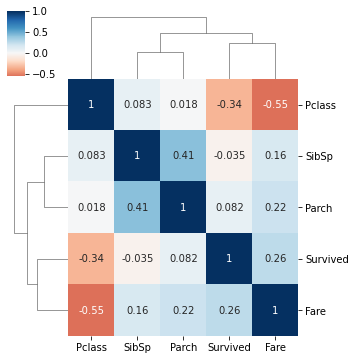

In [66]:
sns.clustermap(df_clustermap.corr(), cmap='RdBu',center=0,figsize = (5,5),annot = True);

In [68]:
df.drop(columns = ['Passenger_count'],inplace=True)

**Observations**

- The feature 'PassengerId' seems to be relatively uncorrelated with the other features, and may be safely disregarded
- The target variable, **Survived**, seems positively correlated with Fare and Parch.  On the other hand, Survived holds a negative correlation with Pclass
- **Fare** seems positively correlated with Survived, Parch, SibSp and Age. On the other hand, the correlation with Pclass is highly negative
- **SibSp** and **Parch** are highly positive correlated, and both are negatively correlated with Age





Now that we have a clear picture of the relationship between numerical features, let's study the relationship between them in an organised way. Also, in the last part of this section we will analyse the empirical relationship of the categorical variables Sex and Port of Embarkation with other features. 

#### <u>Survived</u>

 **Survived and Class**

There exist an obvious negative correlation between class and survival likelihood. On the one hand, the number of passengers that held a 1st class ticket and survived is higher than the ones who unfortunately died. On the other hand, the number of passengers that had a 3rd class ticket and survived is approximately one third the number of passengers that died.

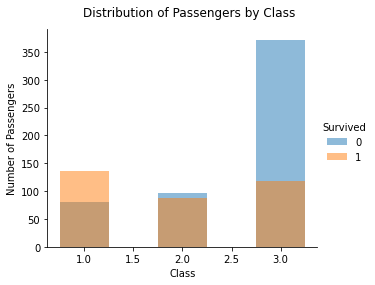

In [69]:
g = sns.FacetGrid(df,hue="Survived",height=4,aspect=1.1)
g.map(sns.histplot,"Pclass",bins =[0.75,1.25,1.75,2.25,2.75,3.25],alpha=0.5,linewidth=0)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Class')
g.set_axis_labels("Class", "Number of Passengers")
g.add_legend();

In an attempt to have a closer look into this we can compute the proportion of passengers that either survived or died by class. 

As it can be seen below, whilst in 1st Class 63% of the passengers survived, only 24% of the 3rd class' passengers survived 

In [70]:
df1 = df.groupby(['Pclass'])['Survived'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

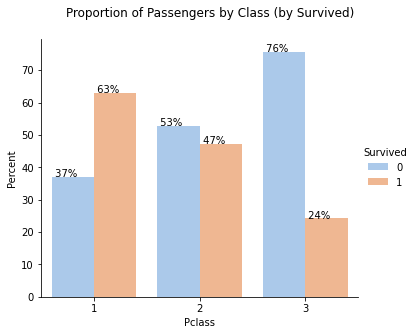

In [71]:
g = sns.catplot(x="Pclass",y="percent",hue="Survived",
...                 data=df1,kind="bar",
...                 height=4.5, aspect=1.1,palette="pastel")
g.fig.suptitle('Proportion of Passengers by Class (by Survived)')
g.set(ylabel="Percent")
plt.subplots_adjust(top=0.88)

for p in g.ax.patches:
    txt = " %.0f" % p.get_height() + '%' #'{:.0f}'.format(height)
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

**Survived and Fare**

In [72]:
df_pivot_table = pd.pivot_table(df,index='Survived',values='Fare')
df_pivot_table

,Fare
Survived,
0,22.117887
1,48.395408


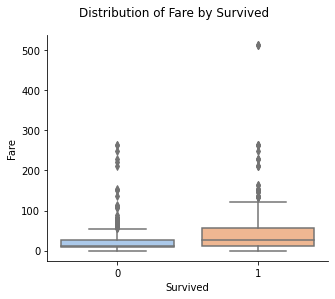

In [73]:
g = sns.catplot(x="Survived", y="Fare",
...                 data=df, kind="box",
...                 height=4, aspect=1.14,palette='pastel')
g.fig.suptitle('Distribution of Fare by Survived')
plt.subplots_adjust(top=0.88);

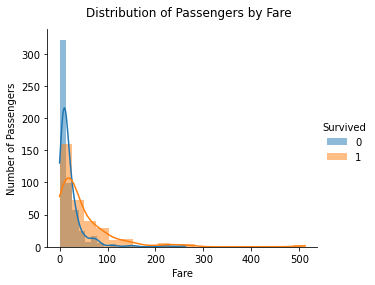

In [74]:
g = sns.FacetGrid(df,hue="Survived",height=4,aspect=1.1)
g.map(sns.histplot,"Fare",alpha=0.5,bins=20,kde=True,linewidth=0)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Fare')
g.set_axis_labels("Fare", "Number of Passengers")
g.add_legend();

**Survived and Sex**

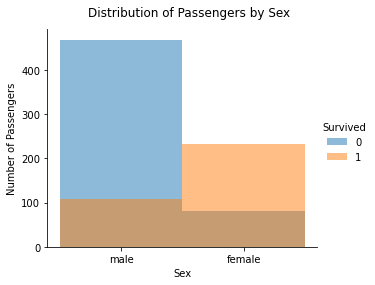

In [75]:
g = sns.FacetGrid(df,hue="Survived",height=4,aspect=1.1)
g.map(sns.histplot,"Sex",alpha=0.5,linewidth=0)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Sex')
g.set_axis_labels("Sex", "Number of Passengers")
g.add_legend();

In [76]:
    df2 = df.groupby(['Sex'])['Survived'].value_counts(normalize=True)
    df2 = df2.mul(100)
    df2 = df2.rename('percent').reset_index()

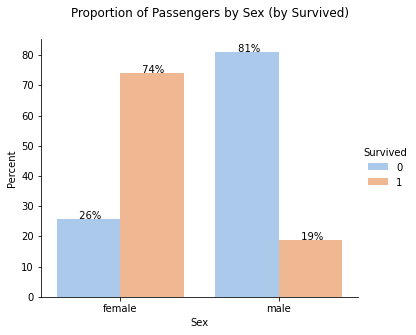

In [77]:
    g = sns.catplot(x="Sex",y="percent",hue="Survived",
    ...                 data=df2,kind="bar",
    ...                 height=4.5, aspect=1.1,palette="pastel")
    g.fig.suptitle('Proportion of Passengers by Sex (by Survived)')
    g.set(ylabel="Percent")
    plt.subplots_adjust(top=0.88)

    for p in g.ax.patches:
        txt = " %.0f" % p.get_height() + '%' #'{:.0f}'.format(height)
        txt_x = p.get_x()  + p.get_width() / 2
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt,ha='center')

**Survived and Age**

In [78]:
pd.pivot_table(df,index='Survived',values='Age')

,Age
Survived,
0,30.626179
1,28.343690


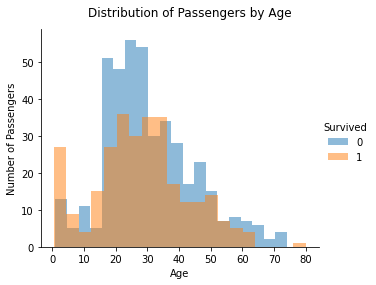

In [79]:
g = sns.FacetGrid(df,hue="Survived",height=4,aspect=1.1)
g.map(sns.histplot,"Age",alpha=0.5,bins=20,linewidth=0)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Age')
g.set_axis_labels("Age", "Number of Passengers")
g.add_legend();

**Survived and SibSp**

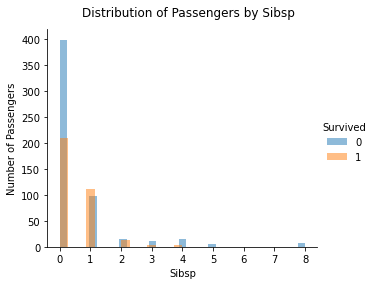

In [80]:
g = sns.FacetGrid(df,hue="Survived",height=4,aspect=1.1)
g.map(sns.histplot,"SibSp",alpha=0.5,linewidth=0)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Sibsp')
g.set_axis_labels("Sibsp", "Number of Passengers")
g.add_legend();

**Survived and Parch**

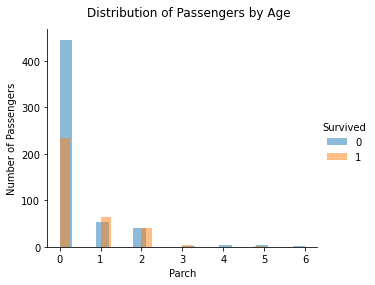

In [81]:
g = sns.FacetGrid(df,hue="Survived",height=4,aspect=1.1)
g.map(sns.histplot,"Parch",alpha=0.5,bins=20,linewidth=0)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Age')
g.set_axis_labels("Parch", "Number of Passengers")
g.add_legend();

#### <u>Fare</u>

**Fare and Class**

In [82]:
def my25(g):
    return np.percentile(g, 25)

def my75(g):
    return np.percentile(g, 75)

box_plot = pd.pivot_table(df,index=['Pclass'],values=['Fare'],
               aggfunc = [np.mean, my25, np.median, my75, np.std])
#box_plot = pd.pivot(box_plot,index="Pclass",values="Fare")
box_plot

,mean,my25,median,my75,std
,Fare,Fare,Fare,Fare,Fare
Pclass,,,,,
1,84.154687,30.92395,60.2875,93.5,78.380373
2,20.662183,13.00000,14.2500,26.0,13.417399
3,13.675550,7.75000,8.0500,15.5,11.778142


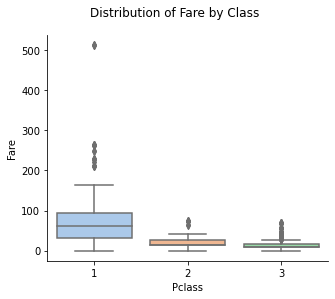

In [83]:
g = sns.catplot(x="Pclass", y="Fare",
...                 data=df, kind="box",
...                 height=4, aspect=1.14,palette='pastel')
g.fig.suptitle('Distribution of Fare by Class')
plt.subplots_adjust(top=0.88);

It can be appreciated that there exist several outliers for all three classes. Also, it is clear to us that the standard desviation for 2nd and 3rd class is much lower than for 1st class, giving rise to the fact that the dispersion of price that were paid to go in 1st class was much wider  than the rest of classes.

**Fare and Age**

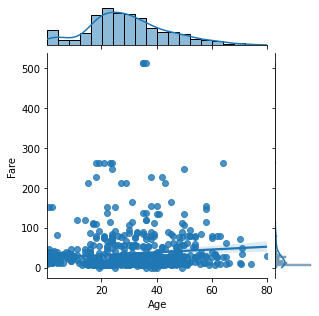

In [84]:
sns.jointplot(data=df, x="Age", y="Fare", palette="pastel",height=4.5,kind="reg")
#plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Age and Fare')
g.set_axis_labels("Class", "Number of Passengers")
g.add_legend();

As we can see, there is nothing that indicates a correlation between Fare and Age. We will see that the situation differs when we input the class.

**Fare and SibSp**

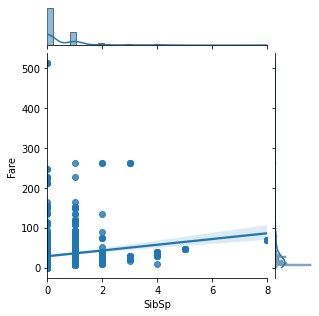

In [85]:
sns.jointplot(data=df, x="SibSp", y="Fare", palette="pastel",height=4.5,kind="reg")
#plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Fare and SibSp')
g.set_axis_labels("Class", "Number of Passengers")
g.add_legend();

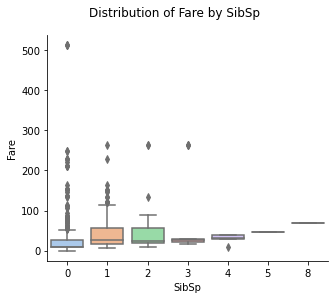

In [86]:
g = sns.catplot(x="SibSp", y="Fare",
...                 data=df, kind="box",
...                 height=4, aspect=1.14,palette='pastel')
g.fig.suptitle('Distribution of Fare by SibSp')
plt.subplots_adjust(top=0.88);

**Fare and Parch**

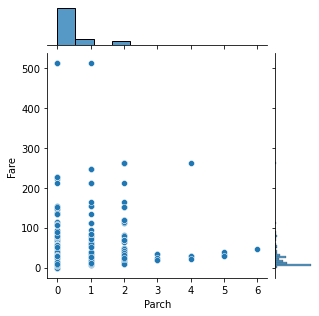

In [87]:
sns.jointplot(data=df, x="Parch", y="Fare", palette="pastel",height=4.5)
#plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Fare and SibSp')
g.set_axis_labels("Class", "Number of Passengers")
g.add_legend();

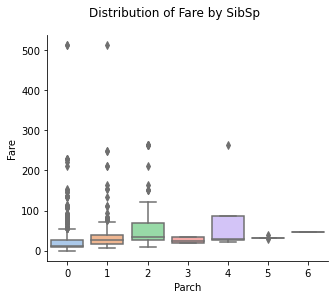

In [88]:
g = sns.catplot(x="Parch", y="Fare",
...                 data=df, kind="box",
...                 height=4, aspect=1.14,palette='pastel')
g.fig.suptitle('Distribution of Fare by SibSp')
plt.subplots_adjust(top=0.88);

Now, let's look at the correlation between SibSp and Parch

#### <u>SibSp and Parch</u>

As these variables are highly correlated, we will start by drawing a heatmap:

In [89]:
#here is the simplist way to add the new column
df['Passenger_count'] = 1

In [90]:
df_sibsp_parch = df.groupby(['SibSp', 'Parch'])['Passenger_count'].count().reset_index()

df_sibsp_parch_pivot = df_sibsp_parch.pivot(index='SibSp', columns='Parch', values='Passenger_count').fillna(0)

df_sibsp_parch_pivot

Parch,0,1,2,3,4,5,6
SibSp,,,,,,,
0,537.0,38.0,29.0,1.0,1.0,2.0,0.0
1,123.0,57.0,19.0,3.0,3.0,3.0,1.0
2,16.0,7.0,4.0,1.0,0.0,0.0,0.0
3,2.0,7.0,7.0,0.0,0.0,0.0,0.0
4,0.0,9.0,9.0,0.0,0.0,0.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0
8,0.0,0.0,7.0,0.0,0.0,0.0,0.0


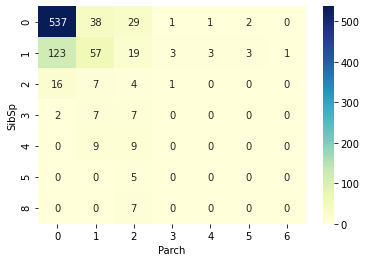

In [91]:
sns.heatmap(df_sibsp_parch_pivot, annot=True, fmt='.0f', cmap="YlGnBu")

In [92]:
sibsp_parch_pivot_max = df_sibsp_parch_pivot.to_numpy().sum()

In [93]:
df_sibsp_parch_prop_pivot = df_sibsp_parch_pivot/sibsp_parch_pivot_max

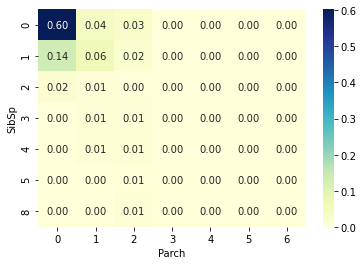

In [94]:
sns.heatmap(df_sibsp_parch_prop_pivot, annot=True, fmt='.2f', cmap="YlGnBu")

Hence, we reach the conclusion that in the Feature Engineering section it would be interesting to join these two features into one feature called **Alone** and will have:
- 1 if the passenger had 0 SibSp and 0 Parch
- 0 if the passenger was with some relative

### Multivariate Analysis: What is the relationship between variables?

We will start this section recalling the heatmap above. This will enable us to derive some observations for our subsequent multivariate analysis.

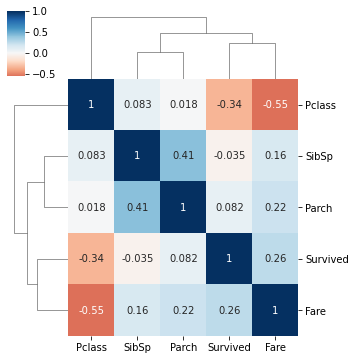

In [95]:
sns.clustermap(df_clustermap.corr(), cmap='RdBu',center=0,figsize = (5,5),annot = True);

**Observations**

- The feature 'PassengerId' seems to be relatively uncorrelated with the other features, and may be safely disregarded
- **Fare** seems positively correlated with Survived, Parch, SibSp and Age. On the other hand, the correlation with Pclass is highly negative
- The target variable, **Survived**, seems positively correlated with Fare and Parch.  On the other hand, Survived holds a negative correlation with Pclass
- **SibSp** and **Parch** are highly positive correlated, and both are negatively correlated with Age





Now that we have a clear picture of the relationship between numerical features, let's study these relationships. Also, let's analyse the role of the categorical variables Sex and Port of Embarkation in these relationships. 

<a id="fare_class_sex_age"></a>
       
#### <u>Fare, Pclass, Sex and Age</u>


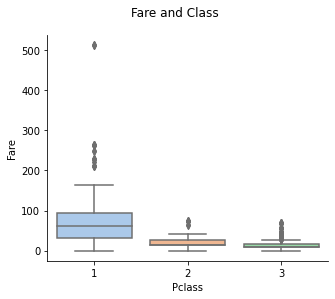

In [96]:
g = sns.catplot(x="Pclass", y="Fare",
...                 data=df, kind="box",
...                 height=4, aspect=1.14,palette='pastel')
g.fig.suptitle('Fare and Class')
plt.subplots_adjust(top=0.88);


As the boxplot above indicates, passengers in 1st class paid significantly more than passengers in 2nd and 3rd class. We will remove outliers to have a better picture.

In [97]:
df1 = df.query("Fare<190")

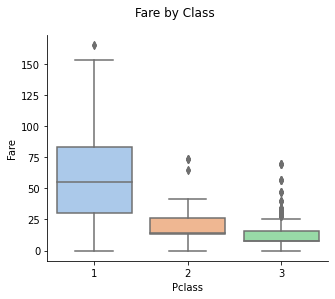

In [98]:
g = sns.catplot(x="Pclass", y="Fare",
...                 data=df1, kind="box",
...                 height=4, aspect=1.14,palette='pastel')
g.fig.suptitle('Fare by Class')
plt.subplots_adjust(top=0.88);

We can conclude that there was a significant difference of Fare by Class, mostly from 1st to the rest of the classes. Did Sex of the Passenger have any influence on price by class?

First, let's see how many women and men there were by class:

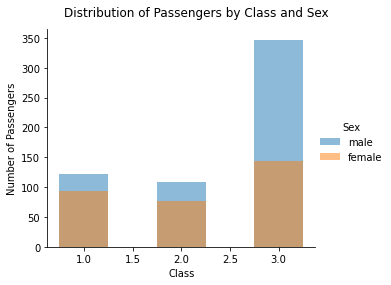

In [99]:
g = sns.FacetGrid(df,hue="Sex",height=4,aspect=1.1)
g.map(sns.histplot,"Pclass",bins =[0.75,1.25,1.75,2.25,2.75,3.25],alpha=0.5,linewidth=0)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Class and Sex')
g.set_axis_labels("Class", "Number of Passengers")
g.add_legend();

A quick bar chart indicates that the number of passenger by sex was similar in 1st and 2nd class, but there exists a significant difference in 3rd class where male passengers were two times the number female passengers.

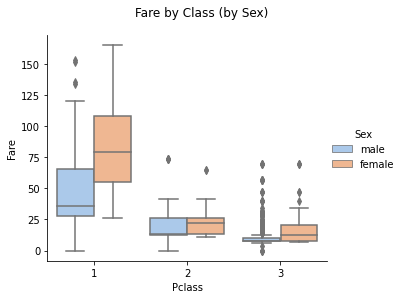

In [100]:
g = sns.catplot(x="Pclass", y="Fare",hue="Sex",
...                 data=df1, kind="box",
...                 height=4, aspect=1.14,palette='pastel')
g.fig.suptitle('Fare by Class (by Sex)')
plt.subplots_adjust(top=0.88);

After removing outliers, female passengers in 1st class paid much more than male passengers. On the other  hand, female passengers for 2nd and 3rd class paid slightly more but the quantity doesn't seem very significant. Let's do a case study for passengers in 1st class as an attempt to see which are the statistical figures for the graph above.

Difference between female and male passengers in 1st class:

In [101]:
male_1st_cls = df[ (df['Sex'] == 'male') & (df['Pclass'] == 1) ]
female_1st_cls = df[ (df['Sex'] == 'female') & (df['Pclass'] == 1) ]

female_1st_cls['Fare'].describe()-male_1st_cls['Fare'].describe()

count   -28.000000
mean     38.899671
std      -3.288033
min      25.929200
25%      29.516700
50%      41.402050
75%      56.040625
max       0.000000
Name: Fare, dtype: float64

For instance, we can now state that a women in 1st class paid +39 British pounds more than a men as an average.

Let's input the age, which we already know it has a negative correlation with Class, to see whether it has an impact on the Fare by Class (by Sex) or not.

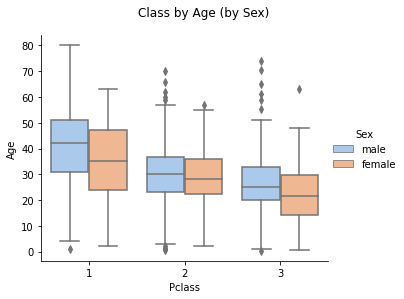

In [102]:
g = sns.catplot(x="Pclass", y="Age",hue="Sex",
...                 data=df1, kind="box",
...                 height=4, aspect=1.14,palette='pastel')
g.fig.suptitle('Class by Age (by Sex)')
plt.subplots_adjust(top=0.88);

The graph above confirms the negative correlation. In fact, passengers in 1st class were older than passengers in 2nd and 3rd class. Also, as an average male passengers were older than female passengers for all classes. 

Next, we should ask ourselves whether the age has an effect on the Fare:

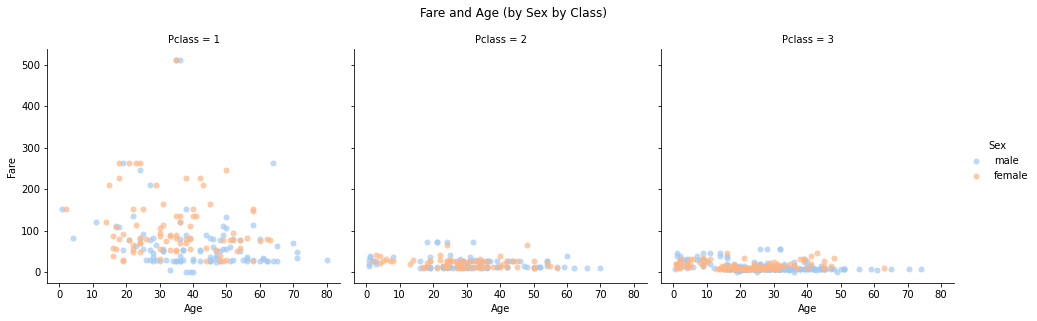

In [103]:
g = sns.FacetGrid(df, col="Pclass", hue="Sex", height=4.5, aspect=1,palette='pastel')
g.map(sns.scatterplot,"Age","Fare",alpha=0.7,linewidth=0)
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Fare and Age (by Sex by Class)')
g.set_axis_labels("Age", "Fare")
g.add_legend();

A quick look into the Age variable gives us some interesting results:
- There seems to be another group, independent of Sex and comprising passengers from 0 to 12 years that seem to be in the same cluster
- Whilst fares for women in 1st class show a very scattered graph, male passengers paid about 30 british pounds and were older, as an average, and the results are less dispersed (as can also be seen in the boxplot above).

Nevertheless, this does not give us any statistical hint about the effect of Age in the Fare. Let's make a case study for the passengers in first class:

In [104]:
df_1st_class = df.query("Pclass==1")
df_2st_class = df.query("Pclass==2")
df_3st_class = df.query("Pclass==3")

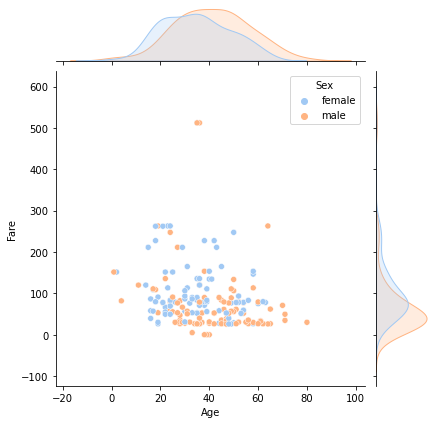

In [105]:
sns.jointplot(data=df_1st_class, x="Age", y="Fare",hue = "Sex", palette="pastel")
#plt.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between Age and Fare')
g.set_axis_labels("Class", "Number of Passengers")
g.add_legend();

As we can see, male passengers are older and paid significantly less than female passengers, in particular we can use the computations done earlier in this section to show the statistical figures for 1st class.

Female passengers:

In [106]:
female_1st_cls['Fare'].describe()

count     94.000000
mean     106.125798
std       74.259988
min       25.929200
25%       57.244800
50%       82.664550
75%      134.500000
max      512.329200
Name: Fare, dtype: float64

Male passengers:

In [107]:
male_1st_cls['Fare'].describe()

count    122.000000
mean      67.226127
std       77.548021
min        0.000000
25%       27.728100
50%       41.262500
75%       78.459375
max      512.329200
Name: Fare, dtype: float64

<a id="port_of_embarkment"></a>
#### <u>Port of Embarkment</u>

Last but not least, let's try to find out the relationship between Port of Embarkment and other features.

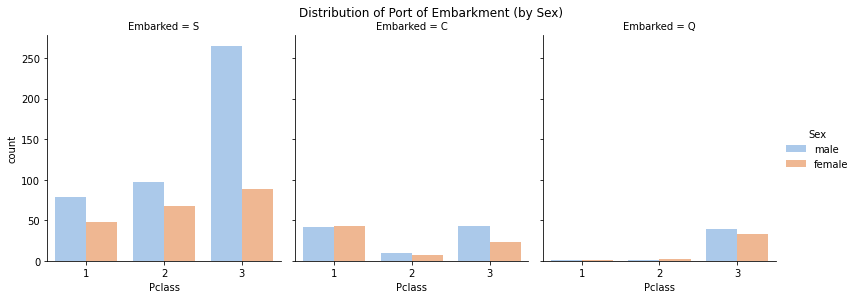

In [117]:
g = sns.catplot(x="Pclass", col="Embarked",hue="Sex",
...                 data=df, kind="count",
...                 height=4, aspect=0.9,palette="pastel")
g.fig.suptitle('Distribution of Port of Embarkment (by Sex)')
plt.subplots_adjust(top=0.88)

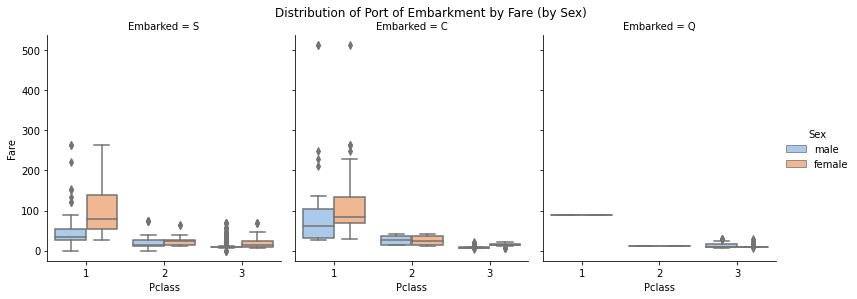

In [118]:
g = sns.catplot(x="Pclass",y="Fare", col="Embarked",hue="Sex",
...                 data=df, kind="box",
...                 height=4, aspect=0.9,palette="pastel")
g.fig.suptitle('Distribution of Port of Embarkment by Fare (by Sex)')
plt.subplots_adjust(top=0.88)

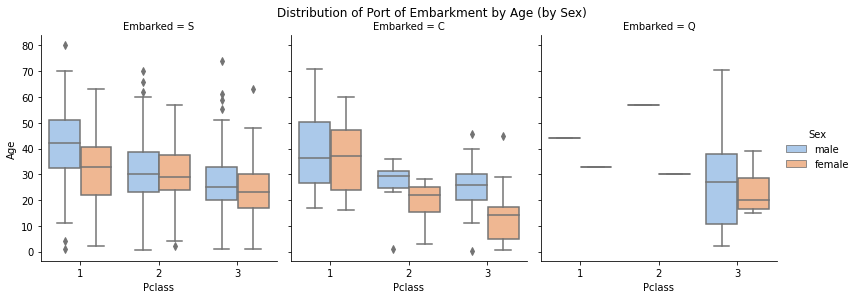

In [119]:
g = sns.catplot(x="Pclass",y="Age", col="Embarked",hue="Sex",
...                 data=df, kind="box",
...                 height=4, aspect=0.9,palette="pastel")
g.fig.suptitle('Distribution of Port of Embarkment by Age (by Sex)')
plt.subplots_adjust(top=0.88)

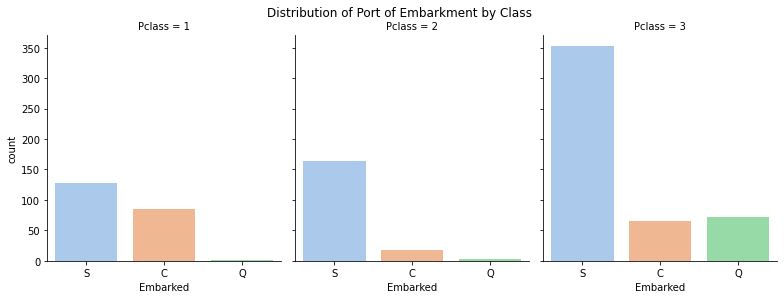

In [122]:
g = sns.catplot(x="Embarked", col="Pclass",
...                 data=df, kind="count",
...                 height=4, aspect=0.9,palette="pastel")
g.fig.suptitle('Distribution of Port of Embarkment by Class')
plt.subplots_adjust(top=0.88)

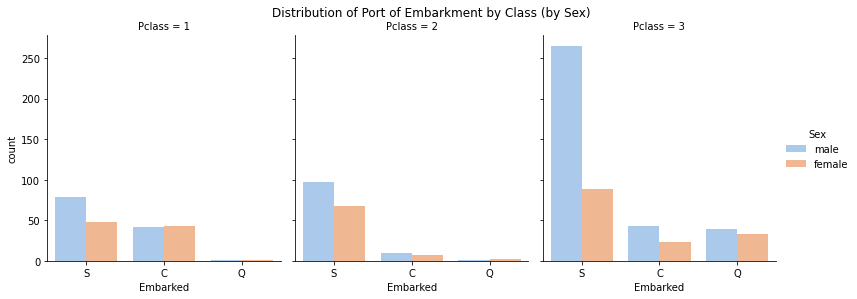

In [123]:
g = sns.catplot(x="Embarked", col="Pclass",hue="Sex",
...                 data=df, kind="count",
...                 height=4, aspect=0.9,palette="pastel")
g.fig.suptitle('Distribution of Port of Embarkment by Class (by Sex)')
plt.subplots_adjust(top=0.88)

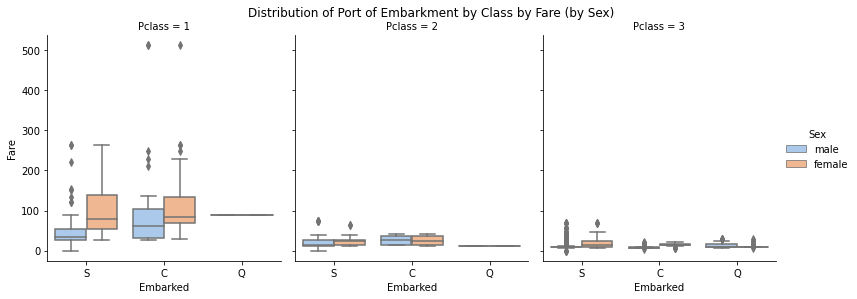

In [124]:
g = sns.catplot(x="Embarked",y="Fare", col="Pclass",hue="Sex",
...                 data=df, kind="box",
...                 height=4, aspect=0.9,palette="pastel")
g.fig.suptitle('Distribution of Port of Embarkment by Class by Fare (by Sex)')
plt.subplots_adjust(top=0.88)

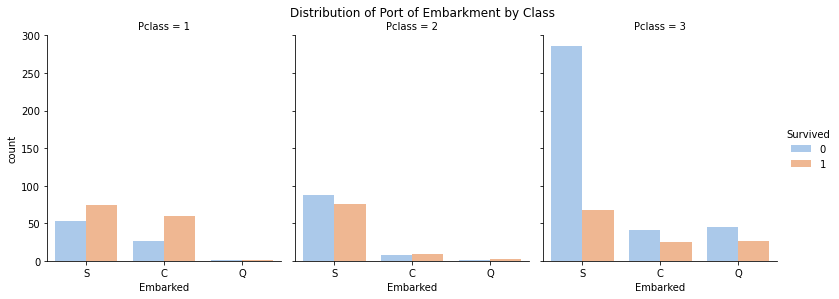

In [125]:
g = sns.catplot(x="Embarked", col="Pclass",hue="Survived",
...                 data=df, kind="count",
...                 height=4, aspect=0.9,palette="pastel")
g.fig.suptitle('Distribution of Port of Embarkment by Class')
plt.subplots_adjust(top=0.88)

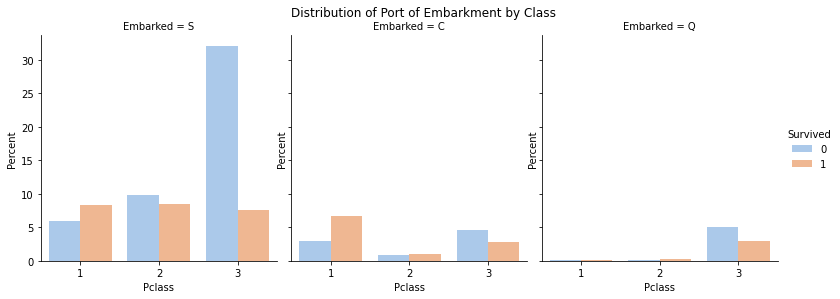

In [126]:
g = sns.catplot(x="Pclass",y="Pclass", col="Embarked",hue="Survived",
...                 data=df,kind="bar",
...                 height=4, aspect=0.9,palette="pastel",estimator=lambda x: len(x) / len(df) * 100)
g.fig.suptitle('Distribution of Port of Embarkment by Class')
g.set(ylabel="Percent")
plt.subplots_adjust(top=0.88)

### What do the variables look like when we split them between passengers that survived and passengers that didn't? 

**Class:** There exist an obvious negative correlation between class and survival likelihood. On the one hand, the number of passengers that held a 1st class ticket and survived is higher than the ones who unfortunately died. On the other hand, the number of passengers that had a 3rd class ticket and survived is approximately one third the number of passengers that died.

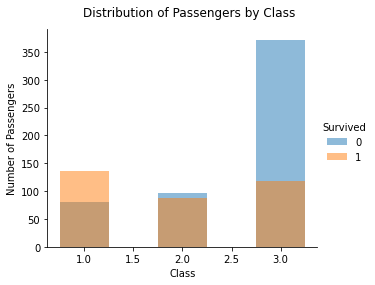

In [127]:
g = sns.FacetGrid(df,hue="Survived",height=4,aspect=1.1)
g.map(sns.histplot,"Pclass",bins =[0.75,1.25,1.75,2.25,2.75,3.25],alpha=0.5,linewidth=0)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Class')
g.set_axis_labels("Class", "Number of Passengers")
g.add_legend();

In an attempt to have a closer look into this we can compute the proportion of passengers that either survived or died by class. 

As it can be seen below, whilst in 1st Class 63% of the passengers survived, only 24% of the 3rd class' passengers survived 

In [128]:
df1 = df.groupby(['Pclass'])['Survived'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

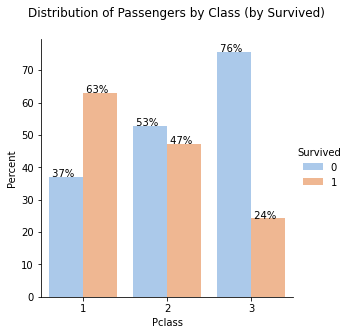

In [129]:
g = sns.catplot(x="Pclass",y="percent",hue="Survived",
...                 data=df1,kind="bar",
...                 height=4.5, aspect=0.9,palette="pastel")
g.fig.suptitle('Distribution of Passengers by Class (by Survived)')
g.set(ylabel="Percent")
plt.subplots_adjust(top=0.88)

for p in g.ax.patches:
    txt = " %.0f" % p.get_height() + '%' #'{:.0f}'.format(height)
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

**Age:** The distribution of the Age is very similar for both passengers that survived and those that did not. Nevertheless, we can appreciate that:
- The number of passengers who died is higher than the survivors. In particular, the proportion is equally distributed for most of the age's range
- The number of passengers in the range of [0,5] years that survived is significantly higher that those who died. This sheds some lights to the approach that was taken to save the most vulnerable passengers first

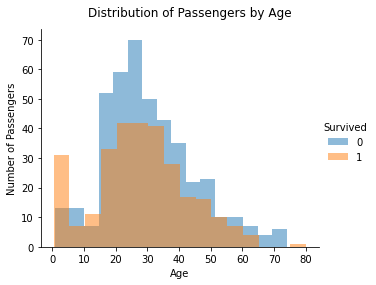

In [130]:
g = sns.FacetGrid(df,hue="Survived",height=4,aspect=1.1)
g.map(sns.histplot,"Age",alpha=0.5,linewidth=0)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Age')
g.set_axis_labels("Age", "Number of Passengers")
g.add_legend();

**Sex:** It is clear that a passenger who is female had a lot more chances to survive than a passenger who was a male

In [132]:
# creating dataframes for survived and non-survived
survived = df[df['Survived'] == 1]
no_survived = df[df['Survived'] == 0]

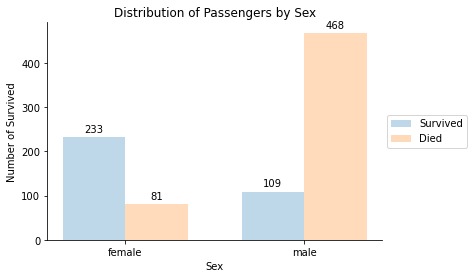

In [133]:
# getting the data
surv_sex = survived.groupby('Sex').Survived.count()
nosurv_sex = no_survived.groupby('Sex').Survived.count()


#----plotting----

ind = np.arange(len(surv_sex))  # the x locations for the groups
width = 0.35       # the width of the bars

dataset1 = np.array(surv_sex)#list of datasets to create the stacked bar chart
dataset2 = np.array(nosurv_sex)

# plot bars
fig, ax = plt.subplots()
bars1 = plt.bar(ind, surv_sex, width, color='#a5c8e1', alpha=.7, label='Survived')
bars2 = plt.bar(ind+width, nosurv_sex, width, color='#ffcb9e', alpha=.7, label='Died')

#data labels
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}'.format(height), #'{}'.
                    #format(p.get_height(), '.0f')
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

        

autolabel(bars1)
autolabel(bars2)

plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True


# title and labels
plt.ylabel('Number of Survived')
plt.xlabel('Sex')
plt.title('Distribution of Passengers by Sex')
locations = ind+width/2  # xtick locations if stacked: ind, if normal barplot: ind+width/2 and bars2 = ind+width
labels = ['female', 'male']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

**SibSp:** Similar shape for survivals and non-survivals.
- The number of passengers that did not survive and were alone is twice the passengers that survived and were alone. 
- The number of passengers that survived and did not survived but were with one sibling or spouse is approximately the same. Does this mean that if you were with one relative you had more chances to survive?

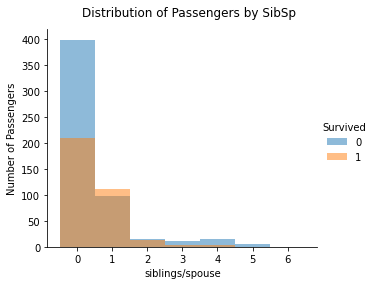

In [134]:
g = sns.FacetGrid(df,hue="Survived",height=4,aspect=1.1)
g.map(sns.histplot,"SibSp",alpha=0.5,linewidth=0,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by SibSp')
g.set_axis_labels("siblings/spouse", "Number of Passengers")
g.add_legend();

**Parch:** Similar idea as SibSp. It would be interesting to create an extra feature joining both variables

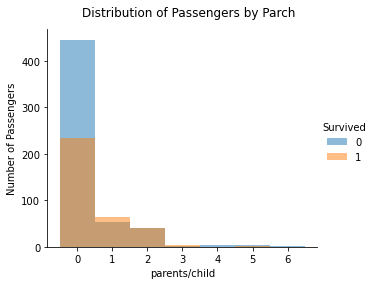

In [135]:
g = sns.FacetGrid(df,hue="Survived",height=4,aspect=1.1)
g.map(sns.histplot,"Parch",alpha=0.5,linewidth=0,bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5])
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Parch')
g.set_axis_labels("parents/child", "Number of Passengers")
g.add_legend();

Finally, plotting a KDE (Kernel Density Estimate) to analyse the distribution of the **Fare**.
- Most of the people that died had paid a very low fare, and the number of passengers dying drops drastically as the fare increase. In other words, there seems to be a positive correlation between fare and the likelihood for a passenger to survive.

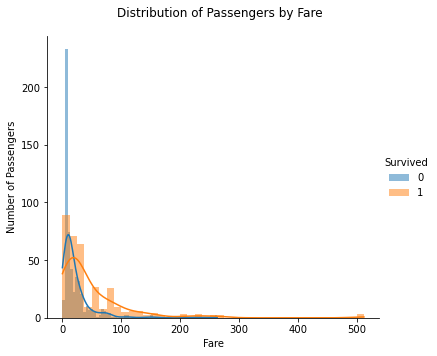

In [136]:
g = sns.FacetGrid(df,hue="Survived",height=5,aspect=1.05)
g.map(sns.histplot,"Fare",kde=True,alpha=0.5,linewidth=0)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Fare')
g.set_axis_labels("Fare", "Number of Passengers")
g.add_legend();


### Which are the key attributes that make a passenger likely to survive? And to die?

Let us first look at the relationship between Class, Sex and the target variable Survived. We look at the distribution of passengers by Class.

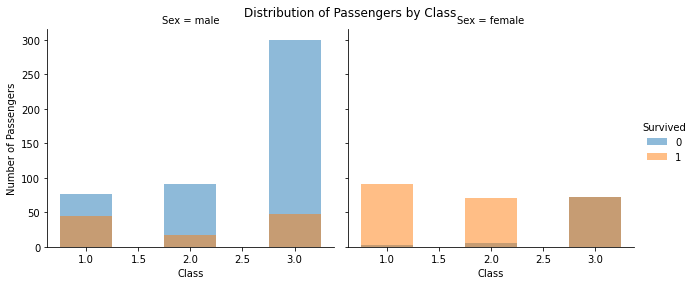

In [137]:
g = sns.FacetGrid(df,col="Sex",hue="Survived",height=4,aspect=1.1)
g.map(sns.histplot,"Pclass",bins =[0.75,1.25,1.75,2.25,2.75,3.25],alpha=0.5,linewidth=0)#,hist=True, rug=False, kde=False,
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by Class')
g.set_axis_labels("Class", "Number of Passengers")
g.add_legend();

**Observations**
- The proportion of male passengers that died is higher for all 1st, 2nd and 3rd class. Also, the number of males dying increments as we get from a higher class (e.g 1st class) to a lower class. 
- The situation is very different for female passengers were basically all the female passengers for 1st and 2nd class survived.

From a similar analysis but now including the feature Age I have highlighted three insights:
- Younger male passengers in 1st class are more likely to survive, but the chances of surviving in 1st class is much higher than the rest of the classes for male passengers
- Female passengers for 1st and 2nd class, independently of the age were prioritised before the rest of male passengers. It is understood from the distribution that the same happened for male child in 2nd and 3rd class.
- Most of the male passengers older than 15 years old died

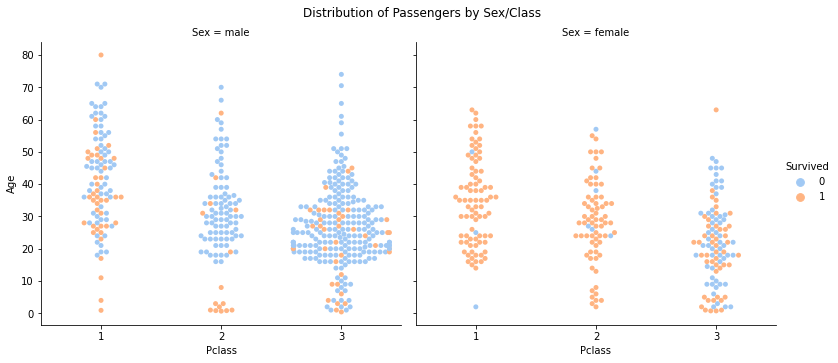

In [138]:
g = sns.catplot(x="Pclass", y="Age",
...                 hue="Survived", col="Sex",
...                 data=df, kind="swarm",
...                 height=4.9, aspect=1.10,palette="pastel")
g.fig.suptitle('Distribution of Passengers by Sex/Class')
plt.subplots_adjust(top=0.88)
#g.set_axis_labels("parents/child", "Number of Passengers")
#g.add_legend()

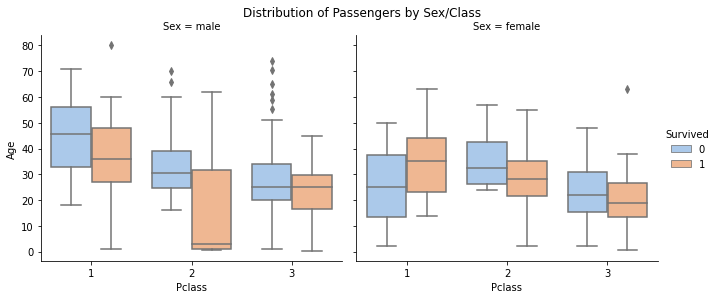

In [139]:
g = sns.catplot(x="Pclass", y="Age",
...                 hue="Survived", col="Sex",
...                 data=df, kind="box",
...                 height=4, aspect=1.14,palette="pastel")
g.fig.suptitle('Distribution of Passengers by Sex/Class')
plt.subplots_adjust(top=0.88)

Now, from [Section 1.3.2.1: Fare, Pclass, Sex and Age](#fare_class_sex_age), we already know that Class and Fare are negatively correlated. In short, as higher the Fare, higher (meaning 1st class is higher than 2nd class, etc) the class and so higher the likelihood to survive.

# Modelling

In [ ]:
# a useful example of a bank dataset with about 34 features.
# This example helps you to decide which features are good for your model
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


## Data Preprocessing for the Model

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [15]:
# Taking care of null values as models do not work well with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Which model to choose to input the class, the sex, the age and the fare and get if the passenger survived or not? This is a classification problem, so our options are:
* Logistic Regression
* K-Nearest Neighbors (K-NN)
* Support Vector Machine (SVM)
* Kernel SVM
* Naive Bayes
* Decision Tree Classification
* Random Forest Classification

In [17]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [18]:
# filling na Age data with the mean
df.Age = df.Age.fillna(df.Age.mean())

# drop 'Embarked' row with null values (only two)
df.dropna(subset = ['Embarked'],inplace=True )

# Some variables in the dataset have different scales. 
# One way of scaling the variables will be by scaling them in such a way that all the values 
# lie between zero and one using the maximum and the minimum values in the data.

# log norm of fare to get a more normal distribution (better for modelling)
df['norm_Fare'] = np.log(df.Fare+1)

# converting PClass to category for pd.get_dummies
df.Pclass = df.Pclass.astype(str)


# categorical variables like Sex are type str, we need to convert them into dummy variables of an int type
# In other words, presence of categorical variables in the dataset for which we would need to create dummy variables
# https://towardsdatascience.com/multivariate-logistic-regression-in-python-7c6255a286ec

# creating dummy variables for our cat variables ( we could have also used One Hot Encoder [recommended])
all_dummies = pd.get_dummies(df[['Pclass', 'Sex', 'Age',
                                 'SibSp','Parch', 'Embarked','norm_Fare']])

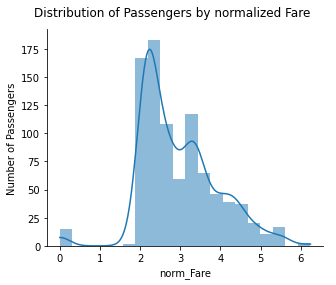

In [19]:
g = sns.FacetGrid(df,height=4,aspect=1.1)
g.map(sns.histplot,"norm_Fare",alpha=0.5,bins=20,kde=True,linewidth=0)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Passengers by normalized Fare')
g.set_axis_labels("norm_Fare", "Number of Passengers")
g.add_legend();

Features: PClass, Sex, Age,  Fare

In [20]:
# Scale data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age', 'SibSp', 'Parch','norm_Fare']] = scale.fit_transform(all_dummies_scaled[['Age', 'SibSp', 'Parch','norm_Fare']])

# Splitting the dataset between train and test
data_train, data_validation, label_train, label_validation = \
    train_test_split(all_dummies_scaled, df["Survived"], test_size=0.3, random_state=5) #input the df, the dependent var, etc


data_train.head(2)

,Age,SibSp,Parch,norm_Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
526,1.569820,-0.475199,-0.474326,-0.534196,0,1,0,1,0,0,0,1
125,-1.362036,0.431350,-0.474326,-0.469575,0,0,1,0,1,1,0,0


In [21]:
print(data_train.shape)
label_train.shape

(622, 12)


(622,)

## Model Building (Baseline Validation Performance)

We want to try different models and see how they perform with default parameters. We will choose 8 different models and examine their performance on the validation set. To do so, we will use he 5 fold cross validation, that is:

The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into 5 groups

For each unique group:
1. Take the group as a hold out or test data set
2. Take the remaining groups as a training data set
3. Fit a model on the training set and evaluate it on the test set
4. Retain the evaluation score and discard the model
5. Summarize the skill of the model using the sample of model evaluation scores

This will enable us to get a baseline. Note that just because a model has a high baseline on this validation set doesn´t mean that it will actually do better on the eventual test set.
* Naive Bayes
* Logistic Regression
* Decision Tree
* K Nearest Neighbors
* Random Forest
* Support Vector Classifier
* Xtreme Gradient Boosting
* Soft Voting Classifier - All Models

**Do not worry about the details of each model. Focus on how to implement them**


In [23]:
# cross validation takes some of the samples of our training set and splits them of.
# It takes random samples of our training data, we run the model on that data and then predicts on that model there
# This way we are validating it on data that is held out and should give us a better estimation of how 
# the model performs in the real world

#importing cross validation library and libraries for the corresponding models
from sklearn.model_selection import cross_val_score 

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [24]:
### Modeling. Part 2: Implementation ###

# We will implement:
# Logistic Regression
# K-Nearest Neighbors (K-NN)
# Support Vector Machine (SVM)
# Kernel SVM
# Naive Bayes
# Decision Tree Classification
# Random Forest Classification


### 1. Naive Bayes Implementation ###
# Naive Bayes, very simple model, widely used as a base line for classification tasks
gnb = GaussianNB()

#Learn Classifier
clf = gnb.fit(data_train, label_train)
#Predict Val data
pred_validation = clf.predict(data_validation)

accuracy = accuracy_score(label_validation, pred_validation)
print(accuracy)
confusion_matrix(label_validation, pred_validation)

cv = cross_val_score(gnb,data_train,label_train,cv=5)
print(cv)
print(cv.mean())


### 2. LogReg Implementation ###
logreg = LogisticRegression(max_iter = 2000)

logreg_cv = cross_val_score(logreg,data_train,label_train,cv=5)
print(logreg_cv)
print(logreg_cv.mean())


### 3. Decision Tree Implementation ###

DecTree = tree.DecisionTreeClassifier(random_state = 1)

dectree_cv = cross_val_score(DecTree,data_train,label_train,cv=5)
print(dectree_cv)
print(dectree_cv.mean())


### 4. K Nearest Neighbors Implementation ###

knn = KNeighborsClassifier()

knn_cv = cross_val_score(knn,data_train,label_train,cv=5)
print(knn_cv)
print(knn_cv.mean())


### 6. Random Forest Classifier Implementation ###

rf = RandomForestClassifier(random_state = 1)

rf_cv = cross_val_score(rf,data_train,label_train,cv=5)
print(rf_cv)
print(rf_cv.mean())


### 7. Support Vector Machine Classifier Implementation ###

SVC = SVC(probability = True)

SVC_cv = cross_val_score(SVC,data_train,label_train,cv=5)
print(SVC_cv)
print(SVC_cv.mean())


### 8. Xtreme Gradient Boosting Classifier Implementation ###
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 1)

xgb_cv = cross_val_score(xgb,data_train,label_train,cv=5)
print(xgb_cv)
print(xgb_cv.mean())

### 8. Voting Classifier Implementation ###

# This classifier takes all of the inputs and averages of the results. For a "hard" voting classifier each classifier gets 1
# vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers.
# A "soft" classifier averages the confidence of each of the models. If the average confidence is > 50% that is a 1

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('logreg',logreg),('knn',knn),('rf',rf),('gnb',gnb),('svc',SVC),('xgb',xgb)], voting ='soft')

voting_cv = cross_val_score(voting_clf,data_train,label_train,cv=5)
print(voting_cv)
print(voting_cv.mean())

#model_cv_list = [cv, logreg_cv,dectree_cv,knn_cv,rf_cv,SVC_cv,xgb_cv,voting_cv] 
model_list = [['Naive Bayes',cv],
              ['Logistic Regression',logreg_cv],
              ['Decision Tree Classifier',dectree_cv],
              ['K Nearest Neighbors Classifier',knn_cv],
              ['Random forest Classifier',rf_cv],
              ['Support Vector Machine Classifier',SVC_cv],
              ['Xtreme Gradient Boosting Classifier',xgb_cv],
              ['Voting Classifier',voting_cv]]
             

for model in model_list:
    print("For ", model[0]," the mean of the 5 fold cross validation is ", model[1].mean())
    
# Voting Classifier (82,46%)

0.8014981273408239
[0.736      0.816      0.76612903 0.70967742 0.7016129 ]
0.745883870967742
[0.808      0.824      0.75806452 0.79032258 0.74193548]
0.7844645161290323
[0.808      0.784      0.71774194 0.81451613 0.75      ]
0.7748516129032258
[0.808      0.792      0.78225806 0.83870968 0.74193548]
0.7925806451612903
[0.848      0.832      0.76612903 0.81451613 0.75      ]
0.8021290322580645
[0.84       0.84       0.78225806 0.83064516 0.77419355]
0.8134193548387095
[0.816      0.824      0.79032258 0.7983871  0.7983871 ]
0.8054193548387097
[0.84       0.848      0.83870968 0.82258065 0.77419355]
0.8246967741935484
For  Naive Bayes  the mean of the 5 fold cross validation is  0.745883870967742
For  Logistic Regression  the mean of the 5 fold cross validation is  0.7844645161290323
For  Decision Tree Classifier  the mean of the 5 fold cross validation is  0.7748516129032258
For  K Nearest Neighbors Classifier  the mean of the 5 fold cross validation is  0.7925806451612903
For  Random

## Future Study

Use the last part of the Ken Jee's youtube video to understand which features have more impact on the model.

Use https://towardsdatascience.com/how-to-use-python-seaborn-for-exploratory-data-analysis-1a4850f48f14 to automatise the study of the relationship among multiple variable